# Top 25 Transfers

### scraping data from transfer markt --> pandas

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from selenium.webdriver import (Chrome, Firefox)
import time
import requests
from bs4 import BeautifulSoup

In [16]:
browser = Firefox()

In [18]:
url = 'https://www.transfermarkt.com/primera-division/transferrekorde/wettbewerb/AR1N/saison_id/alle/land_id/alle/ausrichtung//spielerposition_id//altersklasse//leihe//w_s//zuab/ab'

In [21]:
browser.get(url)

In [56]:
id = 'yw1'

In [57]:
transfer_table = browser.find_element_by_id('yw1')

In [182]:
# print(transfer_table.text)

In [61]:
table_rows = transfer_table.text.split('\n')

In [65]:
transfer_rows = [row.split() for row in table_rows]

In [66]:
transfer_rows

[['#'],
 ['Player', 'Age', 'Season', 'Nat.', 'Joined', 'Fee'],
 ['1'],
 ['Lucas', 'Alario'],
 ['Centre-Forward'],
 ['24', '17/18'],
 ['Bay.', 'Leverkusen'],
 ['Bundesliga'],
 ['24,00', 'Mill.', '€'],
 ['2'],
 ['Leonardo', 'Balerdi'],
 ['Centre-Back'],
 ['19', '18/19'],
 ['Bor.', 'Dortmund'],
 ['Bundesliga'],
 ['15,50', 'Mill.', '€'],
 ['3'],
 ['Sebastián', 'Driussi'],
 ['Centre-Forward'],
 ['21', '17/18'],
 ['Zenit', 'S-Pb'],
 ['Premier', 'Liga'],
 ['15,00', 'Mill.', '€'],
 ['4'],
 ['Lautaro', 'Martínez'],
 ['Centre-Forward'],
 ['20', '18/19'],
 ['Inter'],
 ['Serie', 'A'],
 ['14,00', 'Mill.', '€'],
 ['5'],
 ['Maximiliano', 'Meza'],
 ['Attacking', 'Midfield'],
 ['26', '18/19'],
 ['Monterrey'],
 ['Liga', 'MX', 'Clausura'],
 ['13,15', 'Mill.', '€'],
 ['6'],
 ['Juan', 'Foyth'],
 ['Centre-Back'],
 ['19', '17/18'],
 ['Spurs'],
 ['Premier', 'League'],
 ['13,00', 'Mill.', '€'],
 ['7'],
 ['Ramiro', 'Funes', 'Mori'],
 ['Centre-Back'],
 ['24', '15/16'],
 ['Everton'],
 ['Premier', 'League'],
 ['12

In [183]:
# len(transfer_rows)

In [70]:
to_scrape = transfer_rows[2:-1]

In [71]:
to_scrape

[['1'],
 ['Lucas', 'Alario'],
 ['Centre-Forward'],
 ['24', '17/18'],
 ['Bay.', 'Leverkusen'],
 ['Bundesliga'],
 ['24,00', 'Mill.', '€'],
 ['2'],
 ['Leonardo', 'Balerdi'],
 ['Centre-Back'],
 ['19', '18/19'],
 ['Bor.', 'Dortmund'],
 ['Bundesliga'],
 ['15,50', 'Mill.', '€'],
 ['3'],
 ['Sebastián', 'Driussi'],
 ['Centre-Forward'],
 ['21', '17/18'],
 ['Zenit', 'S-Pb'],
 ['Premier', 'Liga'],
 ['15,00', 'Mill.', '€'],
 ['4'],
 ['Lautaro', 'Martínez'],
 ['Centre-Forward'],
 ['20', '18/19'],
 ['Inter'],
 ['Serie', 'A'],
 ['14,00', 'Mill.', '€'],
 ['5'],
 ['Maximiliano', 'Meza'],
 ['Attacking', 'Midfield'],
 ['26', '18/19'],
 ['Monterrey'],
 ['Liga', 'MX', 'Clausura'],
 ['13,15', 'Mill.', '€'],
 ['6'],
 ['Juan', 'Foyth'],
 ['Centre-Back'],
 ['19', '17/18'],
 ['Spurs'],
 ['Premier', 'League'],
 ['13,00', 'Mill.', '€'],
 ['7'],
 ['Ramiro', 'Funes', 'Mori'],
 ['Centre-Back'],
 ['24', '15/16'],
 ['Everton'],
 ['Premier', 'League'],
 ['12,90', 'Mill.', '€'],
 ['8'],
 ['Rodrigo', 'Bentancur'],
 ['Cent

In [184]:
# player_name = to_scrape[1::7]

In [140]:
# player_names_list = []
# for i in range(len(player_name)):
#     player_names_list.append(' '.join(player_name[i]))

In [139]:
# player_names_list

In [138]:
# player_name[1::7]

In [164]:
from transfer_scrape import scrape_to_list, scrape_to_list_value, scrape_to_list_age_year

In [160]:
players = scrape_to_table(to_scrape, 1, 'player_names')

In [161]:
positions = scrape_to_table(to_scrape, 2, 'player_positions')

In [162]:
league = scrape_to_table(to_scrape, 5, 'league')

In [156]:
value = scrape_to_table_value(to_scrape, 6, 'value')

In [166]:
ages, years = scrape_to_list_age_year(to_scrape)

In [180]:
transfer_table = pd.DataFrame({'player_name':players, 'age_at_transfer':ages, 'positions': positions, 'league': league, 'value($m)': value, 'year_of_transfer': years})

In [185]:
transfer_table

,player_name,age_at_transfer,positions,league,value($m),year_of_transfer
0,Lucas Alario,24,Centre-Forward,Bundesliga,27.36,17/18
1,Leonardo Balerdi,19,Centre-Back,Bundesliga,17.67,18/19
2,Sebastián Driussi,21,Centre-Forward,Premier Liga,17.10,17/18
3,Lautaro Martínez,20,Centre-Forward,Serie A,15.96,18/19
4,Maximiliano Meza,26,Attacking Midfield,Liga MX Clausura,14.99,18/19
5,Juan Foyth,19,Centre-Back,Premier League,14.82,17/18
6,Ramiro Funes Mori,24,Centre-Back,Premier League,14.71,15/16
7,Rodrigo Bentancur,20,Central Midfield,Serie A,14.25,17/18
8,Ezequiel Barco,18,Left Winger,MLS,14.00,17/18
9,Marcelo Saracchi,20,Left-Back,Bundesliga,13.68,18/19


In [200]:
league_dict = {'Bundesliga': 'Germany', 'Premier Liga': 'Russia', 'Serie A': 'Italy',
              'Premier League': 'England', 'MLS': 'United States', 'Super League': 'China',
              'Ligue 1': 'France', 'Eredivisie':'Netherlands', 'Liga MX Clausura': 'Mexico',
              'Segunda División - Segunda Fase': 'Uruguay', 'LaLiga': 'Spain', 'Liga NOS': 'Portugal'}

In [201]:
transfer_table['country']= transfer_table['league'].map(league_dict)

In [351]:
pd.DataFrame.to_csv(transfer_table, '../data/top_25_transfers.csv')

In [202]:
transfer_table

,player_name,age_at_transfer,positions,league,value($m),year_of_transfer,country
0,Lucas Alario,24,Centre-Forward,Bundesliga,27.36,17/18,Germany
1,Leonardo Balerdi,19,Centre-Back,Bundesliga,17.67,18/19,Germany
2,Sebastián Driussi,21,Centre-Forward,Premier Liga,17.10,17/18,Russia
3,Lautaro Martínez,20,Centre-Forward,Serie A,15.96,18/19,Italy
4,Maximiliano Meza,26,Attacking Midfield,Liga MX Clausura,14.99,18/19,Mexico
5,Juan Foyth,19,Centre-Back,Premier League,14.82,17/18,England
6,Ramiro Funes Mori,24,Centre-Back,Premier League,14.71,15/16,England
7,Rodrigo Bentancur,20,Central Midfield,Serie A,14.25,17/18,Italy
8,Ezequiel Barco,18,Left Winger,MLS,14.00,17/18,United States
9,Marcelo Saracchi,20,Left-Back,Bundesliga,13.68,18/19,Germany


In [281]:
attackers_fee = [27.36, 17.1, 15.96, 14.00, 13.68, 12.54, 11.97, 10.26, 10.26, 10.15, 9.69, 9.58]
midfielders_fee = [14.99, 14.25, 11.4, 11.4, 9.58]
defenders_fee = [17.67, 14.82, 14.71, 13.68, 10.93, 10.26, 9.69, 9.69]

In [285]:
print(round(np.mean(attackers_fee), 2))
print(round(np.mean(midfielders_fee), 2))
round(np.mean(defenders_fee), 2)

13.55
12.32


12.68

In [203]:
transfer_table['country'].value_counts()

Italy            4
Germany          4
China            3
France           3
England          2
Russia           2
Netherlands      2
Uruguay          1
Portugal         1
United States    1
Spain            1
Mexico           1
Name: country, dtype: int64

In [206]:
transfer_table['age_at_transfer'].mean()

22.04

In [209]:
round(transfer_table['value($m)'].mean(), 2)

13.02

# Notable transfers

In [250]:
2.88 * 1.14

3.2831999999999995

In [259]:
sold_names = ['Sergio Agüero', 'Gonzalo Higuaín', 'Ángel Di María', 'Paulo Dybala', 'James Rodríguez', 
             'Radamel Falcao', 'Javier Pastore', 'Javier Mascherano', 'Carlos Tevez', 'Diego Forlán']
initial = [24.74, 13.68, 9.12, 13.57, 8.44, 6.19, 7.98, 13.45, 15.39, 11.28 ]
sell_on = [45.60, 40.01, 33.86, 45.60, 46.17, 41.04, 47.88, 14.98, 14.98, 3.28      ]
highest = [45.60, 102.6, 85.5, 45.60, 85.5, 49, 47.88, 25.65, 29.75, 21.55  ]
positions = ['Forward', 'Forward', 'Midfield', 'Forward', 'Midfield', 'Forward', 'Midfield', 'Midfield',
             'Forward', 'Forward']

In [260]:
notable_df = pd.DataFrame({'name': sold_names, 'position': positions, 'initial_fee': initial, 'sell_on_fee': sell_on, 'highest_fee': highest})

In [261]:
notable_df

,name,position,initial_fee,sell_on_fee,highest_fee
0,Sergio Agüero,Forward,24.74,45.60,45.60
1,Gonzalo Higuaín,Forward,13.68,40.01,102.60
2,Ángel Di María,Midfield,9.12,33.86,85.50
3,Paulo Dybala,Forward,13.57,45.60,45.60
4,James Rodríguez,Midfield,8.44,46.17,85.50
5,Radamel Falcao,Forward,6.19,41.04,49.00
6,Javier Pastore,Midfield,7.98,47.88,47.88
7,Javier Mascherano,Midfield,13.45,14.98,25.65
8,Carlos Tevez,Forward,15.39,14.98,29.75
9,Diego Forlán,Forward,11.28,3.28,21.55


In [262]:
notable_df['increase % (max)'] = (notable_df['highest_fee'] / notable_df['initial_fee']) * 100

In [263]:
notable_df

,name,position,initial_fee,sell_on_fee,highest_fee,increase % (max)
0,Sergio Agüero,Forward,24.74,45.60,45.60,184.316896
1,Gonzalo Higuaín,Forward,13.68,40.01,102.60,750.000000
2,Ángel Di María,Midfield,9.12,33.86,85.50,937.500000
3,Paulo Dybala,Forward,13.57,45.60,45.60,336.035372
4,James Rodríguez,Midfield,8.44,46.17,85.50,1013.033175
5,Radamel Falcao,Forward,6.19,41.04,49.00,791.599354
6,Javier Pastore,Midfield,7.98,47.88,47.88,600.000000
7,Javier Mascherano,Midfield,13.45,14.98,25.65,190.706320
8,Carlos Tevez,Forward,15.39,14.98,29.75,193.307342
9,Diego Forlán,Forward,11.28,3.28,21.55,191.046099


In [264]:
notable_df['sell_on_profit'] = round(notable_df['sell_on_fee'] - notable_df['initial_fee'], 2)

In [270]:
notable_df = notable_df[['name', 'position', 'initial_fee', 'sell_on_fee', 'sell_on_profit', 'highest_fee',
       'increase % (max)']]

In [352]:
pd.DataFrame.to_csv(notable_df, '../data/historic_transfers.csv')

In [271]:
notable_df

,name,position,initial_fee,sell_on_fee,sell_on_profit,highest_fee,increase % (max)
0,Sergio Agüero,Forward,24.74,45.60,20.86,45.60,184.316896
1,Gonzalo Higuaín,Forward,13.68,40.01,26.33,102.60,750.000000
2,Ángel Di María,Midfield,9.12,33.86,24.74,85.50,937.500000
3,Paulo Dybala,Forward,13.57,45.60,32.03,45.60,336.035372
4,James Rodríguez,Midfield,8.44,46.17,37.73,85.50,1013.033175
5,Radamel Falcao,Forward,6.19,41.04,34.85,49.00,791.599354
6,Javier Pastore,Midfield,7.98,47.88,39.90,47.88,600.000000
7,Javier Mascherano,Midfield,13.45,14.98,1.53,25.65,190.706320
8,Carlos Tevez,Forward,15.39,14.98,-0.41,29.75,193.307342
9,Diego Forlán,Forward,11.28,3.28,-8.00,21.55,191.046099


In [303]:
# N = 10
# initial = notable_df['initial_fee']
# sell_on = notable_df['sell_on_fee']
# ind = np.arange(N)    # the x locations for the groups
# width = .5       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, initial, width)
# p2 = plt.bar(ind, sell_on - initial, width,
#              bottom=initial, )

# plt.ylabel('$ Transfer Fee(M)')
# plt.title('Notable Transfer Fees From Argentina')
# plt.xticks(ind, ('S. Agüero', 'G. Higuaín', 'A. Di María', 'P. Dybala', 'J. Rodríguez', 'J. Pastore', 'J.Mascherano',
#                 'C.Tevez', 'D.Forlán'))
# plt.yticks(np.arange(0, 80, 10))
# plt.legend((p1[0], p2[0]), ('Transfer Fee from Argentina', 'Sequential Sell On Fee'))

# plt.show()

<BarContainer object of 10 artists>

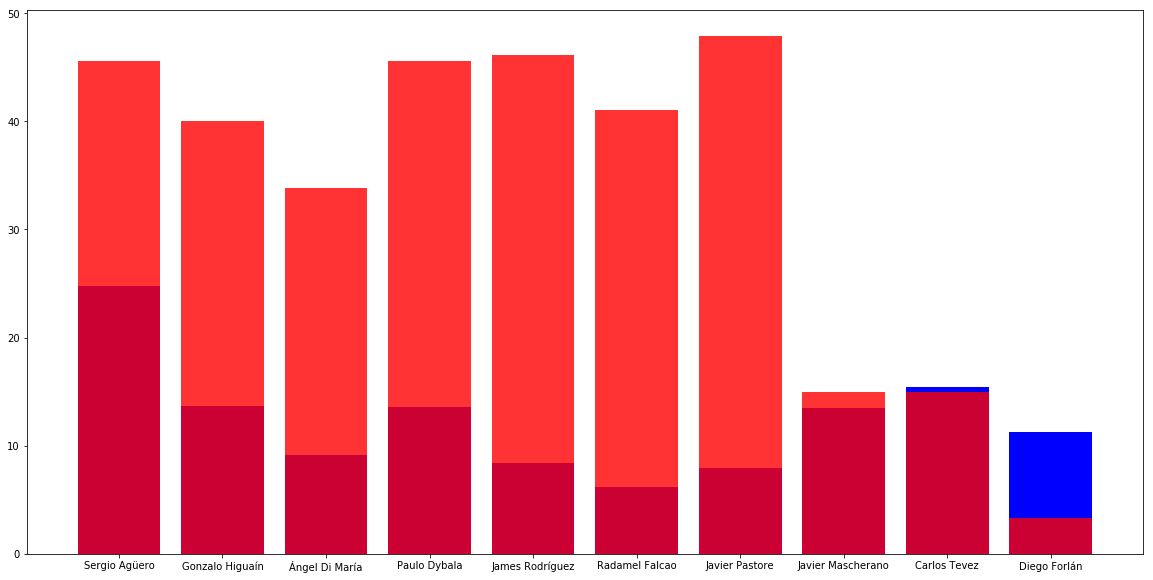

In [341]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(x= notable_df['name'], height=notable_df['initial_fee'], color='b')
plt.bar(x=notable_df['name'], height= notable_df['sell_on_fee'], color='r', alpha=0.8 )
plt.

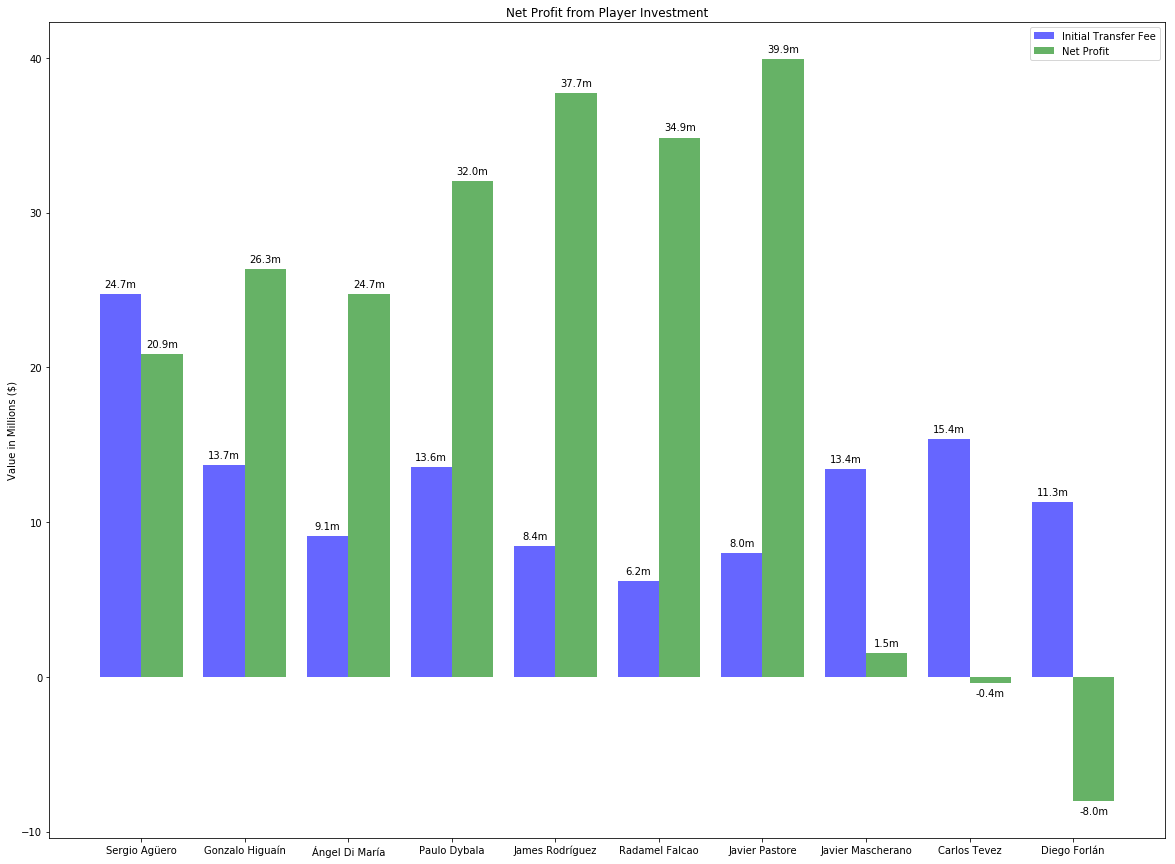

In [350]:
n_groups = 10

initial = notable_df['initial_fee']

profit = notable_df['sell_on_fee'] - notable_df['initial_fee']

max_value = notable_df['highest_fee']


fig, ax = plt.subplots(figsize=(20, 15))

index = np.arange(n_groups)
bar_width = .4

opacity = 0.6


rects1 = ax.bar(index, initial, bar_width,
                alpha=opacity, color='b',
                label='Initial Transfer Fee')

rects2 = ax.bar(index + bar_width, profit, bar_width,
                alpha=opacity, color='g',
                label='Net Profit')

# rects3 = ax.bar(index + bar_width + bar_width, max_value, bar_width,
#                 alpha=opacity, color='y',
#                 label='Max Transfer Fee')



ax.set_ylabel('Value in Millions ($)')
ax.set_title('Net Profit from Player Investment')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(notable_df['name'])
ax.legend()
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.1f}m".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va)                      # Vertically align label differently for
                                    # positive and negative values.



In [353]:
3000 * .8

2400.0

In [354]:
2430 / 3000

0.81

In [357]:
785  * 10

7850